## Imports and definitions

In [1]:
import ot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import glob
import itertools
import sys
import ot

In [2]:
dotmark_pictures_path = "..\\DOTmark_1.0\\Pictures\\"
full_path = os.path.join(os.getcwd(), dotmark_pictures_path)

In [43]:
resolutions = [32, 64, 128, 256, 512]
image_numbers = ['01','02','03','04','05','06','07','08','09','10']

## Reading images

In [51]:
# Define the pattern to match all items in the directory
categories_pattern = os.path.join(dotmark_pictures_path, "*")

# Use a list comprehension to filter only directories
category_dirs = [path for path in glob.glob(categories_pattern) if os.path.isdir(path)]

In [4]:
categories_pattern = os.path.join(dotmark_pictures_path, "*")
category_dirs = glob.glob(categories_pattern)

# Extract just the category names from the full paths
category_names = [os.path.basename(category) for category in category_dirs if os.path.isdir(category)]

# Print the category names to verify
for category in category_names:
    print(category)

CauchyDensity
ClassicImages
GRFmoderate
GRFrough
GRFsmooth
LogGRF
LogitGRF
MicroscopyImages
Shapes
WhiteNoise


In [6]:
categories_pattern

'..\\DOTmark_1.0\\Pictures\\*'

In [46]:
category_dirs = [os.path.join(full_path, cat_name) for cat_name in category_names]

In [55]:
category_dirs

['..\\DOTmark_1.0\\Pictures\\CauchyDensity',
 '..\\DOTmark_1.0\\Pictures\\ClassicImages',
 '..\\DOTmark_1.0\\Pictures\\GRFmoderate',
 '..\\DOTmark_1.0\\Pictures\\GRFrough',
 '..\\DOTmark_1.0\\Pictures\\GRFsmooth',
 '..\\DOTmark_1.0\\Pictures\\LogGRF',
 '..\\DOTmark_1.0\\Pictures\\LogitGRF',
 '..\\DOTmark_1.0\\Pictures\\MicroscopyImages',
 '..\\DOTmark_1.0\\Pictures\\Shapes',
 '..\\DOTmark_1.0\\Pictures\\WhiteNoise']

In [56]:
file_name = f"picture{resolutions[0]}_10{image_numbers[0]}.png"
path = os.path.join(category_dirs[0], file_name)

image1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

file_name2 = f"picture{resolutions[0]}_10{image_numbers[5]}.png"
path2 = os.path.join(category_dirs[0], file_name2)
image2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)

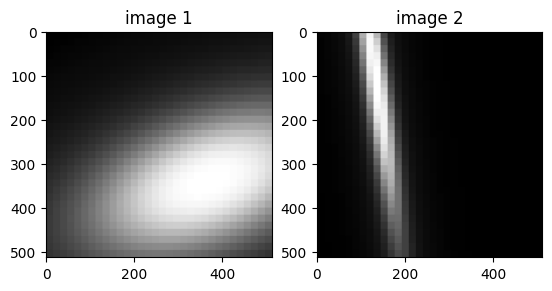

In [57]:
plt.subplot(1,2,1)
plt.title('image 1')
plt.imshow(image2, cmap='gray')

plt.subplot(1,2,2)
plt.title('image 2')
plt.imshow(image, cmap='gray')

In [37]:
ot.lp.emd2(image1, image2, )

TypeError: emd2() missing 1 required positional argument: 'M'

## Scaling up, looking into all pairs of images:

In [13]:
pairs = list(itertools.combinations(image_numbers, 2))

In [20]:
SNR_values = np.logspace(start=3, stop=-2, num=31)

MemoryError: Unable to allocate 512. GiB for an array with shape (262144, 262144, 2) and data type int32

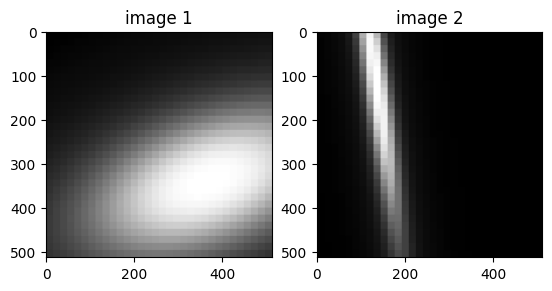

In [38]:
df_im_l1 = pd.DataFrame()
for category in category_names:
    category_dir = os.path.join(full_path, category)
    for resolution in resolutions:
        for SNR in SNR_values:
            for image_pair in pairs:
                #Here we would like to noise and compare each pair of images. We would want to create a confusion matrix
                #We essentially want this step to output 3 things:
                # Conf_mat(I1_noised,I2_noised)
                # Conf_mat(I1, I2)
                # emd(I, I_tilde) for every image, only thing to think about is whether we want to noise at every stage or not.
                path_im1 = os.path.join(category_dir, f"picture{resolution}_10{image_pair[0]}.png")
                im1 = cv2.imread(path_im1, cv2.IMREAD_GRAYSCALE)
                path_im2 = os.path.join(category_dir, f"picture{resolution}_10{image_pair[1]}.png")
                im2 = cv2.imread(path_im1, cv2.IMREAD_GRAYSCALE)

                plt.subplot(1,2,1)
                plt.title('image 1')
                plt.imshow(image2, cmap='gray')
                
                plt.subplot(1,2,2)
                plt.title('image 2')
                plt.imshow(image, cmap='gray')
                                
                df_im_l1 = run_experiment_and_append_images(df=df_im_l1, im1=im1, im2=im2, SNR=SNR, distance_metric='L2', n_samples=30)
                

In [11]:
all_pairs

[('01', '02'),
 ('01', '03'),
 ('01', '04'),
 ('01', '05'),
 ('01', '06'),
 ('01', '07'),
 ('01', '08'),
 ('01', '09'),
 ('01', '10'),
 ('02', '03'),
 ('02', '04'),
 ('02', '05'),
 ('02', '06'),
 ('02', '07'),
 ('02', '08'),
 ('02', '09'),
 ('02', '10'),
 ('03', '04'),
 ('03', '05'),
 ('03', '06'),
 ('03', '07'),
 ('03', '08'),
 ('03', '09'),
 ('03', '10'),
 ('04', '05'),
 ('04', '06'),
 ('04', '07'),
 ('04', '08'),
 ('04', '09'),
 ('04', '10'),
 ('05', '06'),
 ('05', '07'),
 ('05', '08'),
 ('05', '09'),
 ('05', '10'),
 ('06', '07'),
 ('06', '08'),
 ('06', '09'),
 ('06', '10'),
 ('07', '08'),
 ('07', '09'),
 ('07', '10'),
 ('08', '09'),
 ('08', '10'),
 ('09', '10')]